In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
#import seaborn as sns
#sns.set_style('whitegrid')
#sns.set_style("whitegrid", {'axes.grid' : False})

/home/minny/anaconda3/envs/GBLFI-final/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_num=1
score_name = 'es'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_gk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

In [3]:
for i in outputs:
    print(i['config']['step_size_seq'])

[DeviceArray(0.03162277, dtype=float32)]
[DeviceArray(0.03162277, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.00031623, dtype=float32)]
[DeviceArray(0.001, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(3.1622776e-06, dtype=float32)]


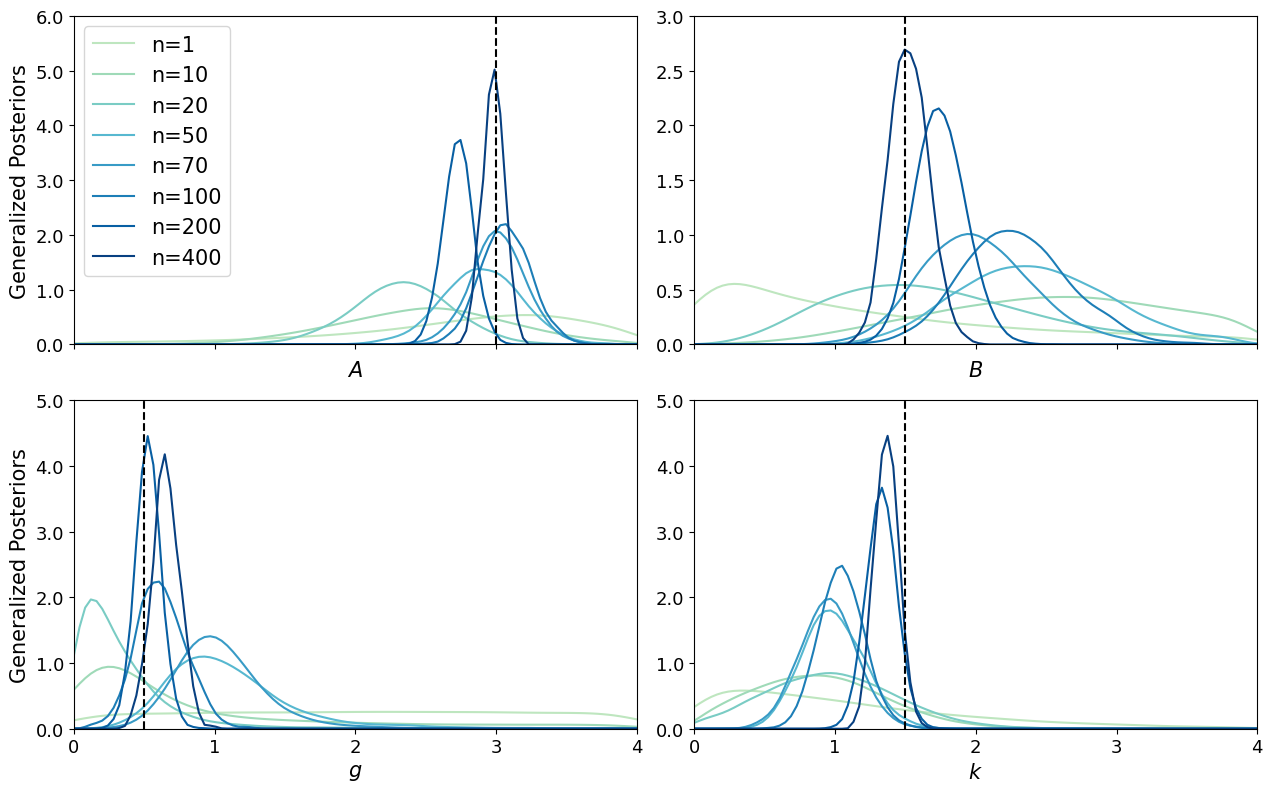

In [4]:
from scipy.stats import gaussian_kde
import matplotlib as mpl
params = {
   'text.usetex': False,
   'figure.figsize': [6.4, 4],
    'font.size': 9,
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'legend.fontsize': 15,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
   }
from matplotlib.ticker import FormatStrFormatter

y_maxes = [6,3,5,5]

with mpl.rc_context(params):
    smoothing = 0.2
    mid = [3., 1.5,0.5,1.5]
    fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(12.8,8))
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$']
    obs_num = [1,10,20,50,70,100,200,400]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(1,0),(1,1)]):
        axs[ax_idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        for obs_idx in range(8):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            xmin, xmax = np.min(post_samples), np.max(post_samples)
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            axs[ax_idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        axs[ax_idx].set_xlim([0,4])
        axs[ax_idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[ax_idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[ax_idx].set_ylabel('') 

        axs[ax_idx].get_xaxis().set_ticks(range(0,5))
        if ax_idx not in [(1,0), (1,1)]:
            axs[ax_idx].get_xaxis().set_ticklabels([])

        axs[ax_idx].set_xlabel(xlab_leg[idx])
        axs[ax_idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[(0,0)].legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG ES well-specified g-and-k concentration.pdf", bbox_inches='tight')

In [5]:
exp_num=1
score_name = 'ks'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_gk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

In [6]:
for i in outputs:
    print(i['config']['w'])
    print(i['config']['step_size_seq'])

28.12237233935826
[DeviceArray(0.1, dtype=float32)]
28.12237233935826
[DeviceArray(0.03162277, dtype=float32)]
28.12237233935826
[DeviceArray(0.01, dtype=float32)]
28.12237233935826
[DeviceArray(0.001, dtype=float32)]
28.12237233935826
[DeviceArray(0.001, dtype=float32)]
28.12237233935826
[DeviceArray(1.e-04, dtype=float32)]
28.12237233935826
[DeviceArray(3.1622778e-05, dtype=float32)]
28.12237233935826
[DeviceArray(3.1622778e-05, dtype=float32)]


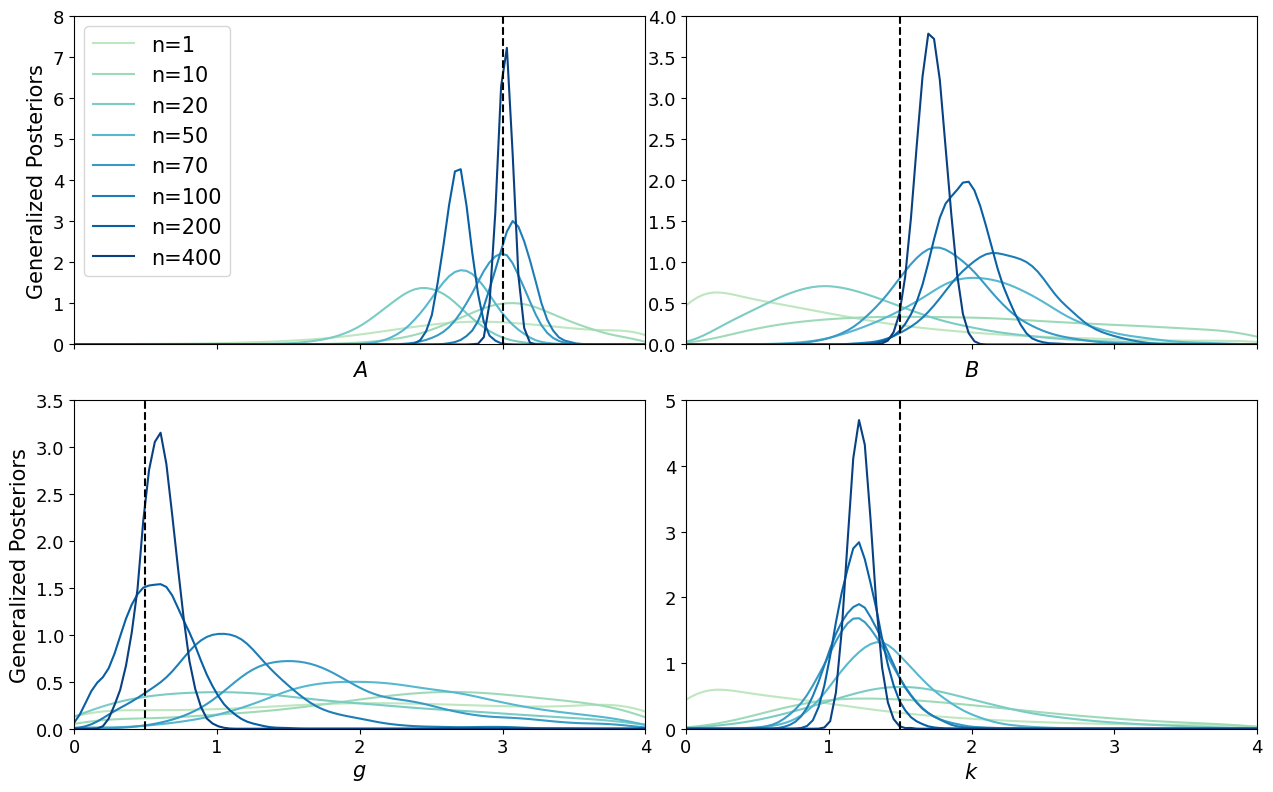

In [8]:
params = {
   'text.usetex': False,
   'figure.figsize': [6.4, 4],
    'font.size': 9,
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'legend.fontsize': 15,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
   }
from matplotlib.ticker import FormatStrFormatter

y_maxes = [8,4,3.5,5]

with mpl.rc_context(params):
    smoothing = 0.2
    mid = [3., 1.5,0.5,1.5]
    fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(12.8,8))
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$']
    obs_num = [1,10,20,50,70,100,200,400]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(1,0),(1,1)]):
        #axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        for obs_idx in range(8):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            xmin, xmax = np.min(post_samples), np.max(post_samples)
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            axs[ax_idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        axs[ax_idx].set_xlim([0,4])
        axs[ax_idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[ax_idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[ax_idx].set_ylabel('') 

        axs[ax_idx].get_xaxis().set_ticks(range(0,5))
        if ax_idx not in [(1,0), (1,1)]:
            axs[ax_idx].get_xaxis().set_ticklabels([])

        axs[ax_idx].set_xlabel(xlab_leg[idx])
        axs[ax_idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[(0,0)].legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG KS well-specified g-and-k concentration.pdf", bbox_inches='tight')